In [1]:
pip install -r requirements.txt

  Using cached pandas-2.2.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (19 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.7 MB/s eta 0:00:00
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.4 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 63.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

Dataset loaded successfully with 10841 rows and 13 columns.
Dataset Summary:              Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
Dataset Head:                                                    App        Category  Rating  \
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                 Coloring book moana  ART_AND_DESIGN     3.9   
2   U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                               Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4               Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                          Paper flowers instructions  ART_AND_DESIGN     4.4   
6             Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                    Infinite Painter  ART_AND_DESIGN     4.1   
8      

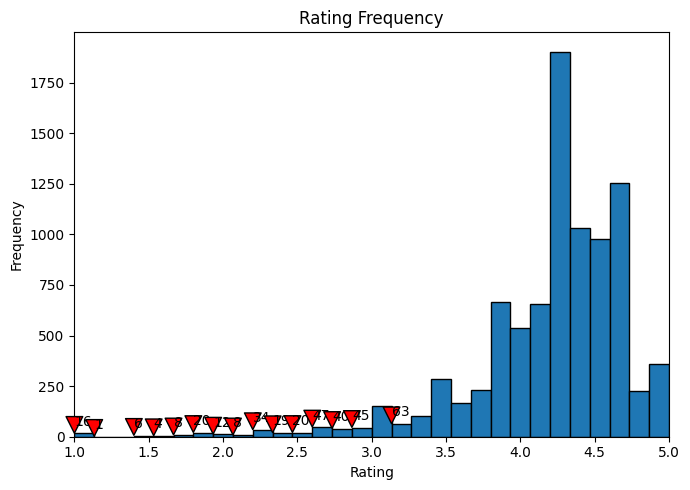

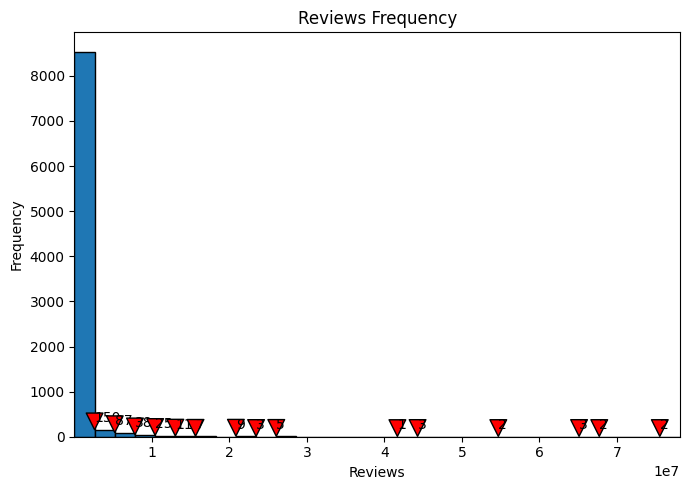

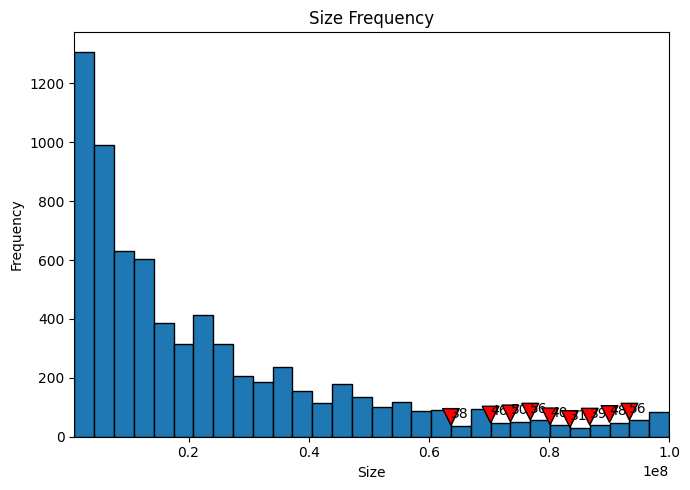

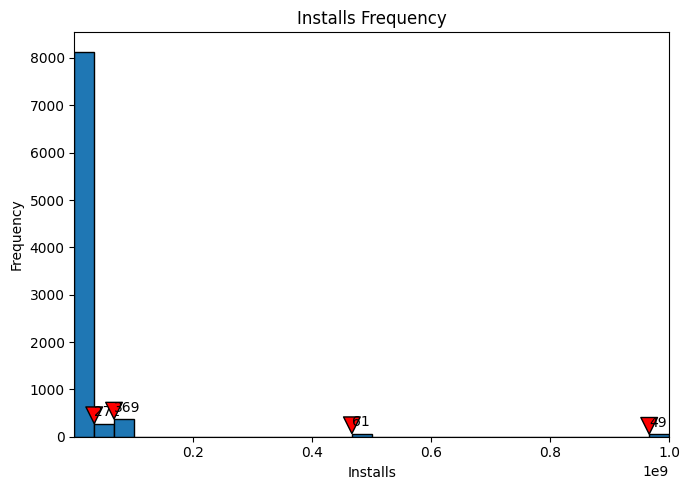

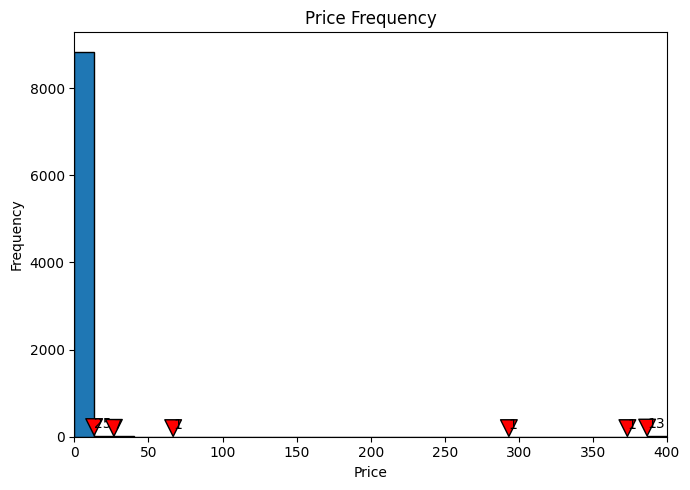

Correlation Matrix:
            Rating   Reviews  Installs     Price
Rating    1.000000  0.068724  0.050869 -0.022371
Reviews   0.068724  1.000000  0.633422 -0.009562
Installs  0.050869  0.633422  1.000000 -0.011334
Price    -0.022371 -0.009562 -0.011334  1.000000


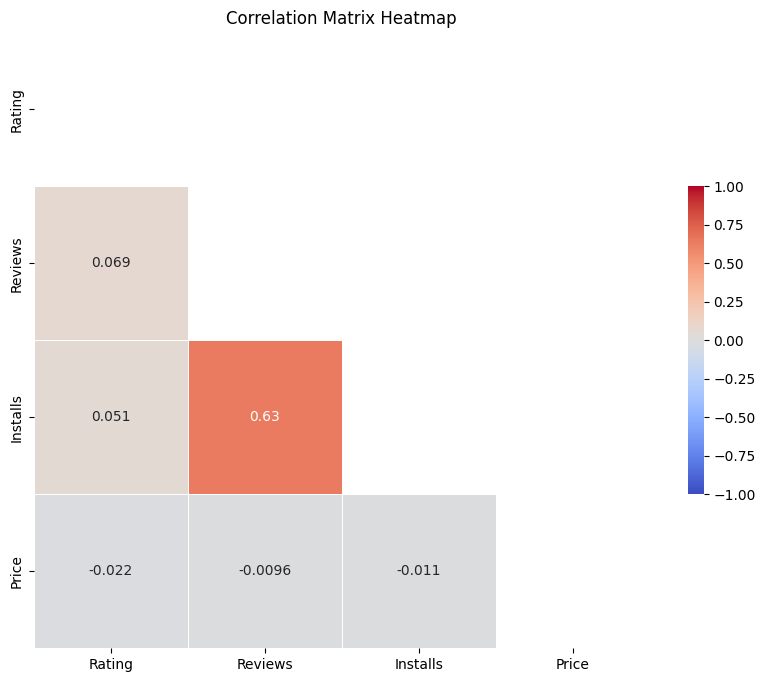

Correlations Matrix
            Rating   Reviews  Installs     Price
Rating    1.000000  0.068724  0.050869 -0.022371
Reviews   0.068724  1.000000  0.633422 -0.009562
Installs  0.050869  0.633422  1.000000 -0.011334
Price    -0.022371 -0.009562 -0.011334  1.000000


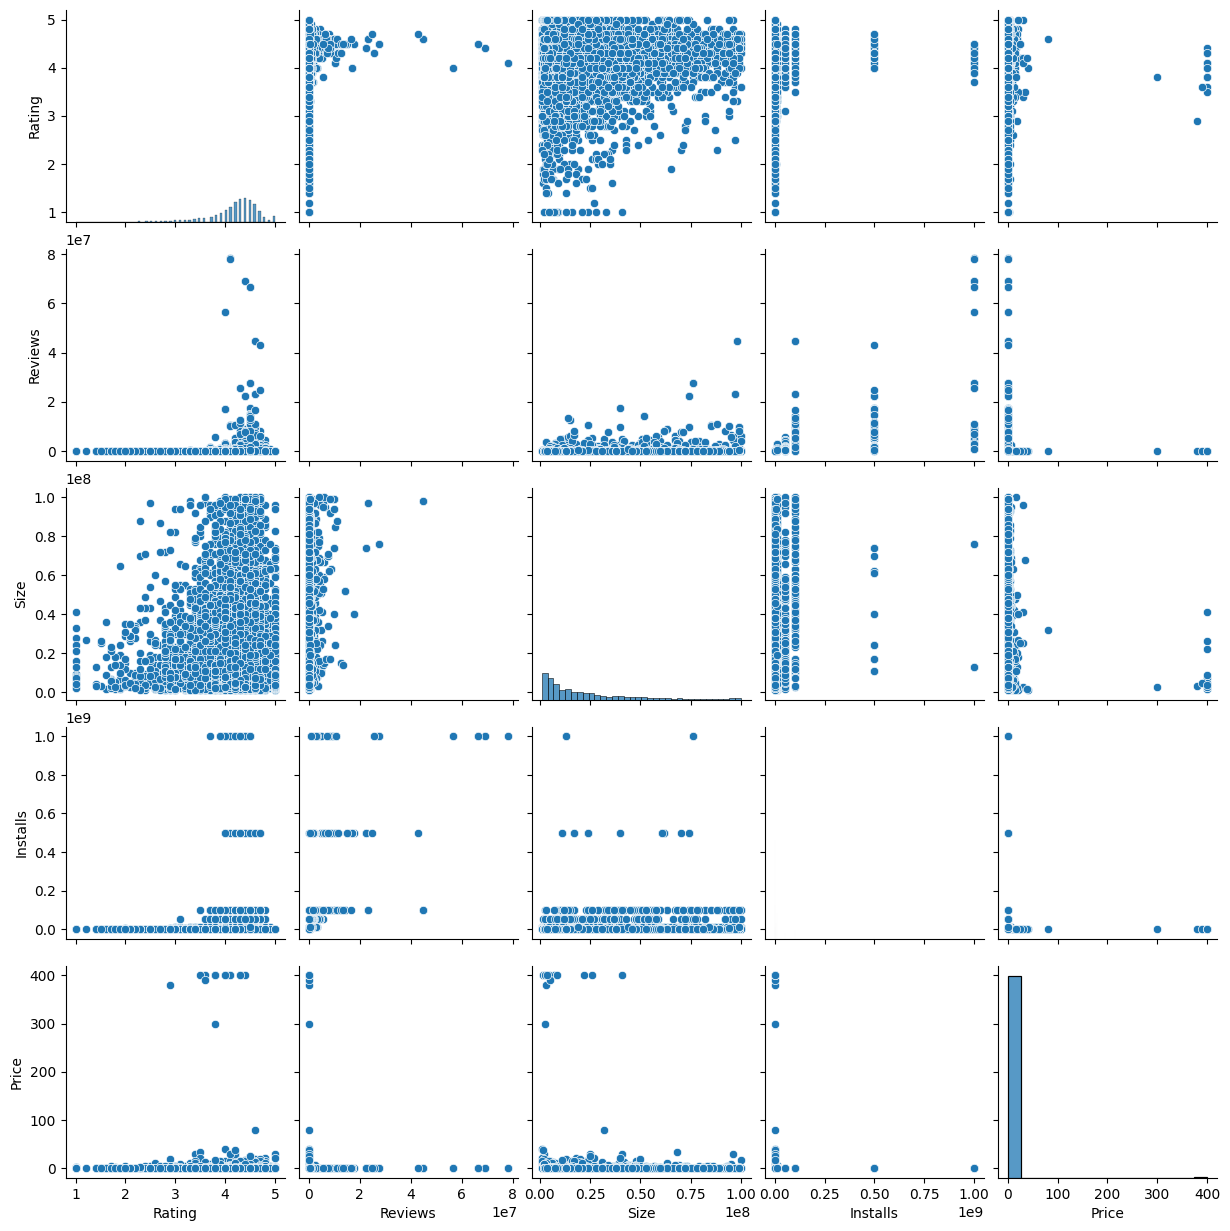

user_review_analytics
                                                   App  \
0                                10 Best Foods for You   
1                     104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室   
2                                                 11st   
3                           1800 Contacts - Lens Store   
4                      1LINE – One Line with One Touch   
..                                                 ...   
860  Hotels.com: Book Hotel Rooms & Find Vacation D...   
861     Hotspot Shield Free VPN Proxy & Wi-Fi Security   
862                                            Hotstar   
863                     Hotwire Hotel & Car Rental App   
864                     Housing-Real Estate & Property   

                                Sentiment_Distribution  Polarity_Mean  \
0    {'Positive': 0.8350515463917526, 'Neutral': 0....       0.470733   
1    {'Positive': 0.775, 'Neutral': 0.2, 'Negative'...       0.392405   
2    {'Positive': 0.575, 'Neutral': 0.25, 'Negative...       0

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import os


def load_dataset(dataset):
    try:
        dataset = pd.read_csv(dataset)
        print(f"Dataset loaded successfully with {dataset.shape[0]} rows and {dataset.shape[1]} columns.")
        return dataset
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None


def print_summarize_dataset(dataset):
    print("Dataset Summary: ", dataset.describe())
    print("Dataset Head: ", dataset.head(20))


def clean_dataset(dataset):
    print("Pre-Cleaning Number of Rows: ", len(dataset))
    dataset_cleaned = dataset.drop_duplicates()
    print(f"Removed {dataset.shape[0] - dataset_cleaned.shape[0]} duplicate rows.")
    missing_values = dataset_cleaned.isnull().sum()
    print("Missing values per column: ", missing_values[missing_values > 0])
    
    # Optional: drop rows with missing values or unwanted values such as NaN
    dataset_cleaned = dataset_cleaned.dropna()
    print(f"Removed rows with missing values, new shape: {dataset_cleaned.shape}")
    
    # Fix numerical column data types
    dataset_cleaned['Reviews'] = pd.to_numeric(dataset_cleaned['Reviews'], errors='coerce')
    
    dataset_cleaned['Size'] = dataset_cleaned['Size'].str.rstrip('M')
    dataset_cleaned['Size'] = pd.to_numeric(dataset_cleaned['Size'], errors='coerce')
    dataset_cleaned['Size'] = dataset_cleaned['Size'] * 1000000
    
    dataset_cleaned['Installs'] = dataset_cleaned['Installs'].str.replace('[^\\d]', '', regex=True)
    dataset_cleaned['Installs'] = pd.to_numeric(dataset_cleaned['Installs'], errors='coerce')

    dataset_cleaned['Price'] = dataset_cleaned['Price'].str.replace('[^\\d.]', '', regex=True)
    dataset_cleaned['Price'] = pd.to_numeric(dataset_cleaned['Price'], errors='coerce')
    
    
    # Detect outliers 
    def detect_outliers_z_score(column_data, threshold=1.5):
        z_scores = np.abs(stats.zscore(column_data))
        outliers_count = np.sum(z_scores > threshold)
        return outliers_count

    columns_to_check = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
    for column in columns_to_check:
        outliers_in_df = detect_outliers_z_score(dataset_cleaned[column])
        print(f'Outliers in {column}: ', outliers_in_df)

    print("Post-Cleaning Number of Rows: ", len(dataset_cleaned))
    return dataset_cleaned



def print_histograms(dataset):
    numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

    hist_dir = 'histograms'
    if not os.path.exists(hist_dir):
        os.makedirs(hist_dir)

    for column in numeric_columns:
        plt.figure(figsize=(7, 5))
        counts, bins, patches = plt.hist(dataset[column], bins=30, edgecolor='black')

        plt.title(column + " Frequency")
        plt.xlabel(column)
        plt.ylabel('Frequency')
        x_min = dataset[column].min()
        x_max = dataset[column].max()
        plt.xlim(x_min, x_max)

        # Adding arrows or text labels for non-negative values
        for count, bin_edge in zip(counts, bins):
            if count > 0 and count < max(counts) * 0.05:  # Threshold for small bars
                plt.annotate(f'{int(count)}', 
                             xy=(bin_edge, count), 
                             xytext=(bin_edge, count + max(counts) * 0.02),
                             arrowprops=dict(facecolor='red', shrink=0.05))

        plt.tight_layout()
        plt.savefig(os.path.join(hist_dir, f'{column}_histogram.png'))
        plt.show()
        plt.close()


def compute_correlations_matrix(dataset):
    corr_dir = 'correlations'
    if not os.path.exists(corr_dir):
        os.makedirs(corr_dir)
        
    numeric_dataset = dataset.select_dtypes(include=['number'])
    
    # Remove columns with constant values
    numeric_dataset = numeric_dataset.loc[:, (numeric_dataset != numeric_dataset.iloc[0]).any()]

    # Check for missing values and drop them or fill them
    if numeric_dataset.isnull().values.any():
        print("Warning: Dataset contains NaNs, these will be dropped for correlation calculation.")
        numeric_dataset = numeric_dataset.dropna(axis=1, how='any')
    
    correlation_matrix = numeric_dataset.corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    
    # Ensure the matrix is not empty
    if not correlation_matrix.empty:
        mask = np.zeros_like(correlation_matrix)
        mask[np.triu_indices_from(mask)] = True
        
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, mask=mask, vmin=-1, vmax=1, linewidths=0.5, square=True, cbar_kws={"shrink": .5})
        plt.title('Correlation Matrix Heatmap')
    else:
        print("Correlation matrix is empty or all values are 1.")
    plt.savefig(os.path.join(corr_dir, f'correlation_matrix.png'))
    plt.show()
    plt.close()
    return correlation_matrix


def print_scatter_matrix(dataset, height=2.5):
    scatter_dir = 'scatter'
    if not os.path.exists(scatter_dir):
        os.makedirs(scatter_dir)

    sns.pairplot(dataset, height=height, diag_kind='hist')
    plt.savefig(os.path.join(scatter_dir, f'scatter_matrix.png'))
    plt.show()
    plt.close()



def analyze_user_reviews(file_path):
    analytics_dir = 'user_analytics'
    if not os.path.exists(analytics_dir):
        os.makedirs(analytics_dir)
        
    df = pd.read_csv(file_path)
    
    df = df.dropna(subset=['Sentiment'])
    
    df['Sentiment_Polarity'] = pd.to_numeric(df['Sentiment_Polarity'], errors='coerce')
    df['Sentiment_Subjectivity'] = pd.to_numeric(df['Sentiment_Subjectivity'], errors='coerce')
    
    user_reviews_df = df.groupby('App').agg({
        'Sentiment': lambda x: x.value_counts(normalize=True).to_dict(),
        'Sentiment_Polarity': ['mean', 'min', 'max'],
        'Sentiment_Subjectivity': ['mean', 'min', 'max']
    }).reset_index()
    
    # Rename columns for clarity
    user_reviews_df.columns = ['App', 'Sentiment_Distribution', 'Polarity_Mean', 'Polarity_Min', 'Polarity_Max', 'Subjectivity_Mean', 'Subjectivity_Min', 'Subjectivity_Max']
    user_reviews_df.to_parquet(f'{analytics_dir}/user_review_analytics.parquet', index=False)
    
    
    
    # Sort apps by mean polarity and subjectivity
    top_10_apps_polarity = user_reviews_df.nlargest(10, 'Polarity_Mean')
    lowest_10_apps_polarity = user_reviews_df.nsmallest(10, 'Polarity_Mean')
    top_10_apps_subjectivity = user_reviews_df.nlargest(10, 'Subjectivity_Mean')
    lowest_10_apps_subjectivity = user_reviews_df.nsmallest(10, 'Subjectivity_Mean')
    
    # Merge the DataFrames as required
    # 1) High polarity and low subjectivity
    high_polarity_low_subjectivity = pd.concat(
        [top_10_apps_polarity.drop(columns='Sentiment_Distribution'), 
         lowest_10_apps_subjectivity.drop(columns='Sentiment_Distribution')]
    ).drop_duplicates(subset=['App'])

    # Filter out apps with non-positive polarity in high polarity table
    high_polarity_low_subjectivity = high_polarity_low_subjectivity[high_polarity_low_subjectivity['Polarity_Mean'] > 0]

    # 2) Low polarity and high subjectivity
    low_polarity_high_subjectivity = pd.concat(
        [lowest_10_apps_polarity.drop(columns='Sentiment_Distribution'), 
         top_10_apps_subjectivity.drop(columns='Sentiment_Distribution')]
    ).drop_duplicates(subset=['App'])

    # Filter out apps with non-negative polarity in low polarity table
    low_polarity_high_subjectivity = low_polarity_high_subjectivity[low_polarity_high_subjectivity['Polarity_Mean'] < 0]

    # Save the merged DataFrames to Excel files
    high_polarity_low_subjectivity.to_excel(f'{analytics_dir}/high_polarity_low_subjectivity.xlsx', index=False)
    low_polarity_high_subjectivity.to_excel(f'{analytics_dir}/low_polarity_high_subjectivity.xlsx', index=False)
    
    
    return user_reviews_df



def check_missing_values(df, columns_to_check, check_all=False):
    if check_all:
        missing_columns = [col for col in df.columns if df[col].isnull().any()]
        if missing_columns:
            print(f"YES MISSING VALUES in columns: {', '.join(missing_columns)}")
        else:
            print("No missing values in any column.")
    else:
        if not columns_to_check:
            print("Error: Empty list of columns to check.")
            return
        missing_columns = [col for col in columns_to_check if df[col].isnull().any()]
        if missing_columns:
            print(f"YES MISSING VALUES in columns: {', '.join(missing_columns)}")
        else:
            print("No missing values in specified columns.")


# -------------------------------
# MAIN
def main():
    csv_files = ['archive/googleplaystore.csv', 'archive/googleplaystore_user_reviews.csv']
    df = load_dataset(csv_files[0])
    df_dir = 'dataframe_output'
    if not os.path.exists(df_dir):
        os.makedirs(df_dir)
    
    if df is not None:
        print_summarize_dataset(df)
        
        cleaned_df = clean_dataset(df)
        cleaned_df.to_excel(f'{df_dir}/cleaned_df.xlsx', index=False)
        check_missing_values(cleaned_df, [], True)
        
        print_histograms(cleaned_df)
        
        correlations = compute_correlations_matrix(cleaned_df)
        print(f'Correlations Matrix\n{correlations}')
        
        print_scatter_matrix(cleaned_df)
        
    user_review_analytics = analyze_user_reviews(csv_files[1])
    print(f"user_review_analytics\n{user_review_analytics}")


# MAIN  
if __name__ == '__main__':
    main()

Dataset loaded successfully with 10841 rows and 13 columns.
Category: ART_AND_DESIGN, Highest Rated App: X Launcher Pro - IOS Style Theme & Control Center, Rating: 4.8
Category: AUTO_AND_VEHICLES, Highest Rated App: Ulysse Speedometer Pro, Rating: 4.6
Category: BOOKS_AND_REFERENCE, Highest Rated App: Hey AJ! It's Saturday!, Rating: 5.0
Category: BUSINESS, Highest Rated App: Tiny Scanner Pro: PDF Doc Scan, Rating: 4.8
Category: COMMUNICATION, Highest Rated App: 2 Amateur ham radio CW Morse code practice keys TX, Rating: 4.8
Category: DATING, Highest Rated App: Moco+ - Chat, Meet People, Rating: 4.2
Category: EDUCATION, Highest Rated App: Sago Mini Hat Maker, Rating: 4.9
Category: ENTERTAINMENT, Highest Rated App: My Talking Pet, Rating: 4.6
Category: FAMILY, Highest Rated App: Hey AJ! It's Bedtime!, Rating: 5.0
Category: FINANCE, Highest Rated App: My Budget Book, Rating: 4.7
Category: FOOD_AND_DRINK, Highest Rated App: My CookBook Pro (Ad Free), Rating: 4.6
Category: GAME, Highest Rate

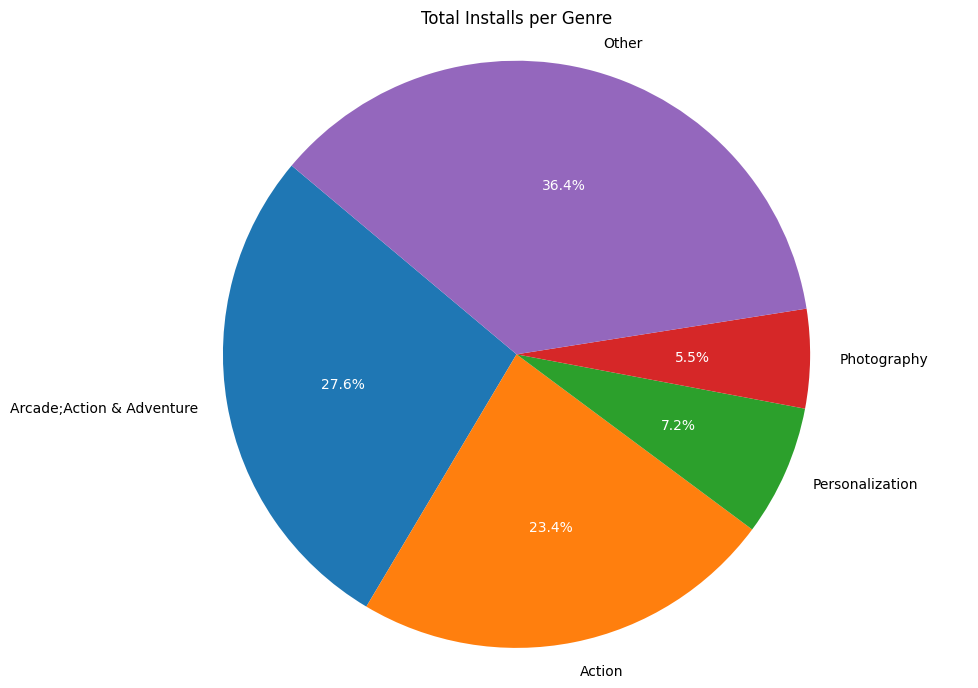

Arcade;Action & Adventure
Action
Personalization
Photography
Other


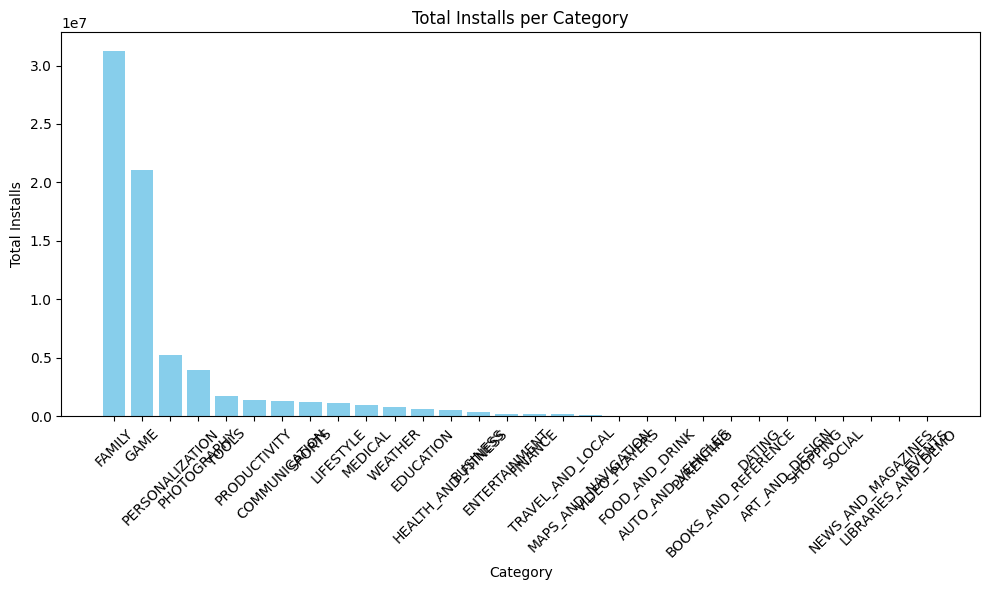

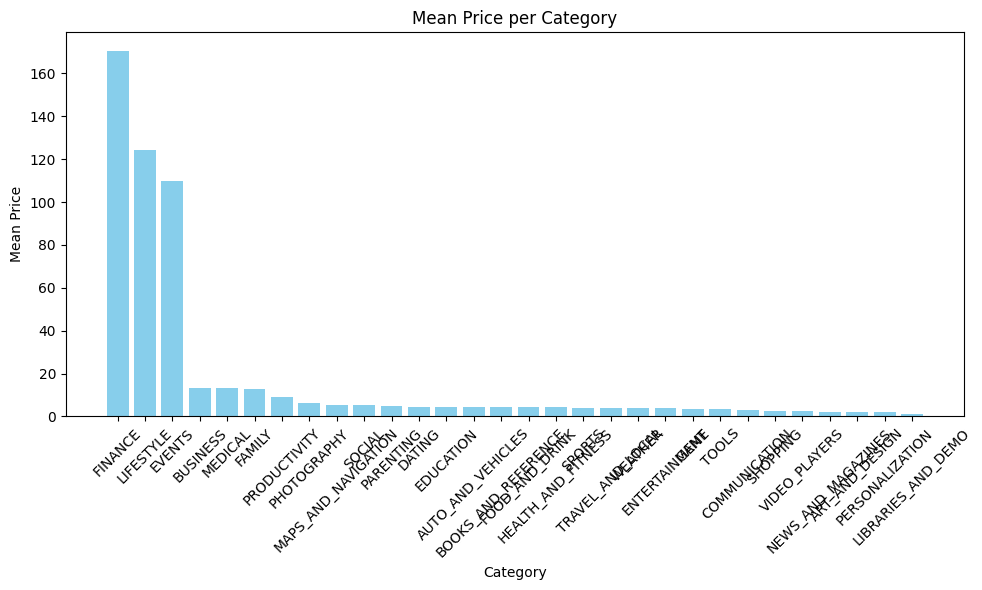

In [14]:
import os
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt



def load_dataset(dataset):
    try:
        dataset = pd.read_csv(dataset)
        print(f"Dataset loaded successfully with {dataset.shape[0]} rows and {dataset.shape[1]} columns.")
        return dataset
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None


report_dir = 'report_plots'
if not os.path.exists(report_dir):
    os.makedirs(report_dir)


def most_popular_apps(dataset, paid=True):
    if paid:
        filtered_data = dataset[dataset['Type'] == 'Paid']
    else:
        filtered_data = dataset[dataset['Type'] == 'Free']
    filtered_data = filtered_data.dropna(subset=['Rating'])
    idx_max_ratings = filtered_data.groupby('Category')['Rating'].idxmax()
    popular_apps = filtered_data.loc[idx_max_ratings]
    for _, row in popular_apps.iterrows():
        print(f"Category: {row['Category']}, Highest Rated App: {row['App']}, Rating: {row['Rating']}")
    
    return popular_apps


def most_popular_genres(dataset, paid=True):
    if paid:
        filtered_data = dataset[dataset['Type'] == 'Paid']
    else:
        filtered_data = dataset[dataset['Type'] == 'Free']
    filtered_data = filtered_data.dropna(subset=['Installs'])
    filtered_data['Installs'] = filtered_data['Installs'].str.replace(r'[^\d]', '', regex=True).astype(int)
    installs_per_genre = filtered_data.groupby('Genres')['Installs'].sum().sort_values(ascending=False)
    total_installs = installs_per_genre.sum()
    percentages = (installs_per_genre / total_installs) * 100
    threshold = 5
    main_genres = percentages[percentages >= threshold]
    other_genres = percentages[percentages < threshold]
    main_installs = installs_per_genre[main_genres.index]
    other_installs = installs_per_genre[other_genres.index].sum()
    if other_installs > 0:
        main_installs['Other'] = other_installs
        main_genres['Other'] = (other_installs / total_installs) * 100
    labels = main_genres.index
    sizes = main_installs.values
    plt.figure(figsize=(10, 7))
    def autopct_generator(pct):
        return '%1.1f%%' % pct if pct >= threshold else ''
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct=autopct_generator, startangle=140)
    for autotext in autotexts:
        autotext.set_color('white')

    plt.title('Total Installs per Genre')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(f'{report_dir}/total_installs_per_genre.png', bbox_inches='tight')
    plt.show()
    
    installs_list = installs_per_genre.reset_index().values.tolist()
    main_installs_list = main_installs.reset_index().values.tolist()
    output_df = pd.DataFrame(main_installs_list, columns=['Genre', 'Installs'])
    output_df.to_excel(f'{report_dir}/installs_per_genre.xlsx', index=False)

    for label in labels:
        print(label)

    return installs_list



def total_installs_per_category_array(dataset, paid=True):
    if paid:
        filtered_data = dataset[dataset['Type'] == 'Paid']
    else:
        filtered_data = dataset[dataset['Type'] == 'Free']
        
    filtered_data = filtered_data.dropna(subset=['Installs'])
    filtered_data['Installs'] = filtered_data['Installs'].str.replace('[^\\d]', '', regex=True).astype(int)
    installs_per_category = filtered_data.groupby('Category')['Installs'].sum().sort_values(ascending=False)
    installs_list = installs_per_category.reset_index().values.tolist()
    
    output_df = pd.DataFrame(installs_list, columns=['Category', 'Total Installs'])
    output_df.to_excel(f'{report_dir}/total_installs_per_category.xlsx', index=False)
    
    return installs_list


def total_installs_per_category_chart(dataset, paid=True):
    installs_per_category = total_installs_per_category_array(dataset, paid)
    categories = [item[0] for item in installs_per_category]
    total_installs = [item[1] for item in installs_per_category]
    plt.figure(figsize=(10, 6))
    plt.bar(categories, total_installs, color='skyblue')
    plt.title('Total Installs per Category')
    plt.xlabel('Category')
    plt.ylabel('Total Installs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{report_dir}/total_installs_per_category_chart.png')
    plt.show()


def clean_price(price):
    try:
        return float(price.strip('$'))  # Assuming prices are formatted as '$X.XX'
    except ValueError:
        return None


def mean_price_per_category(dataset, paid=True):
    if paid:
        dataset = dataset[dataset['Type'] == 'Paid']
    else:
        dataset = dataset[dataset['Type'] == 'Free']
    
    # Clean up 'Price' column
    dataset.loc[:, 'Price'] = dataset['Price'].apply(clean_price)
    # Filter out rows where 'Price' couldn't be converted to numeric
    dataset = dataset.dropna(subset=['Price'])
    
    # Group by 'Category' and calculate mean price
    mean_price = dataset.groupby('Category')['Price'].mean().sort_values(ascending=False)
    return mean_price

def mean_price_per_category_chart(dataset, paid=True):
    mean_prices = mean_price_per_category(dataset, paid)
    categories = mean_prices.index
    prices = mean_prices.values
    
    plt.figure(figsize=(10, 6))
    plt.bar(categories, prices, color='skyblue')
    plt.title('Mean Price per Category')
    plt.xlabel('Category')
    plt.ylabel('Mean Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'{report_dir}/mean_price_per_category_chart.png')
    plt.show()


def most_expensive_apps_per_category(dataset, paid=True):
    if paid:
        dataset = dataset[dataset['Type'] == 'Paid']
    else:
        dataset = dataset[dataset['Type'] == 'Free']
    dataset.loc[:, 'Price'] = dataset['Price'].apply(clean_price)
    dataset = dataset.dropna(subset=['Price'])
    idx_max_prices = dataset.groupby('Category')['Price'].idxmax()
    most_expensive_apps = dataset.loc[idx_max_prices]
    most_expensive_apps.to_excel(f'{report_dir}/most_expensive_apps_per_category.xlsx', index=False)
    
    return most_expensive_apps


# MAIN
def main():
    csv_files = ['archive/googleplaystore.csv', 'archive/googleplaystore_user_reviews.csv']
    df = load_dataset(csv_files[0])
    
    most_popular_apps(df, True)
    
    most_popular_genres(df, True)
    
    total_installs_per_category_array(df, True)
    
    total_installs_per_category_chart(df, True)

    mean_price_per_category_chart(df, True)
    
    most_expensive_apps_per_category(df, True)


if __name__ == '__main__':
    main()